## Load necessary modules

In [3]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'keras_retinanet'

## Load RetinaNet model

In [15]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model_path = os.path.join('..', 'snapshots', 'inference.h5')

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)

#print(model.summary())

# load label to names mapping for visualization purposes
#coco
# labels_to_names = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}
#visdrone
labels_to_names={0: 'ignored_regions', 1: 'pedestrian', 2: 'people', 3: 'bicycle', 4: 'car', 5: 'van', 6: 'truck', 7: 'tricycle', 8: 'awning-tricycle', 9: 'bus', 10: 'motor', 11: 'others'}

/usr/local/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [16]:
names_to_labels={}
for key,value in labels_to_names.items():
    names_to_labels[value]=key
print(names_to_labels)

{'ignored_regions': 0, 'pedestrian': 1, 'people': 2, 'bicycle': 3, 'car': 4, 'van': 5, 'truck': 6, 'tricycle': 7, 'awning-tricycle': 8, 'bus': 9, 'motor': 10, 'others': 11}


## Run detection on example
if have groud_truth

processing time:  0.059960365295410156


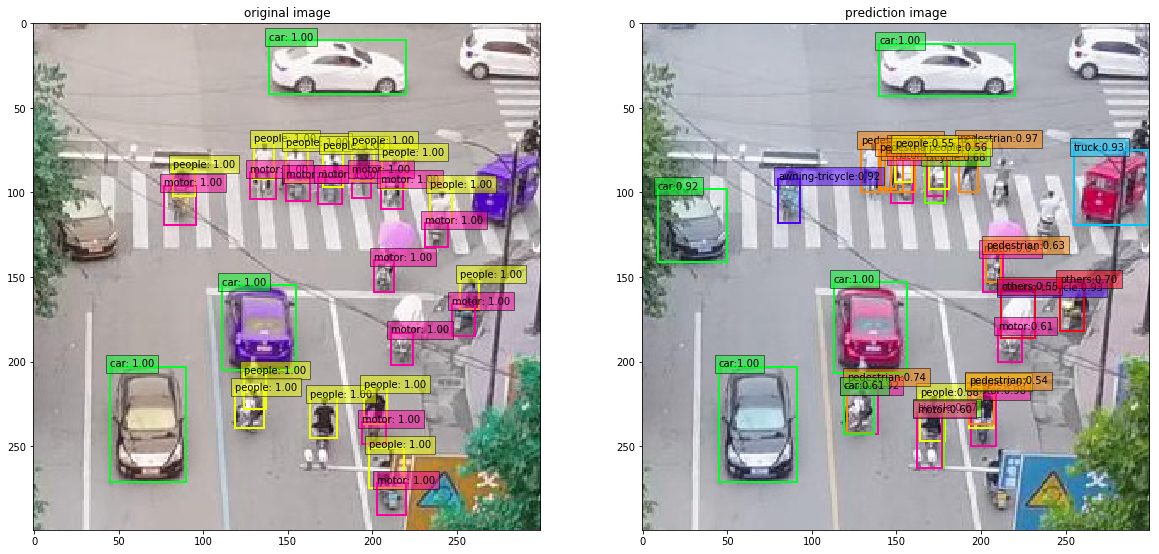

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
## 1.加载原图
import json
json_dir='0000001_03499_d_0000006_009.json'
img_dir='0000001_03499_d_0000006_009.jpg'

fr=open(json_dir)
json_f=json.load(fr)

fig=plt.figure(figsize=(20,20))
fig.add_subplot(1,2,1)
colors = plt.cm.hsv(np.linspace(0, 1, len(names_to_labels))).tolist()
#读取并显示图片
img=io.imread(img_dir)
plt.title('original image')
plt.imshow(img)  # plot the image for matplotlib

currentAxis = plt.gca()

for i in range(json_f['num_box']):
    #find x0,y0,b_width,b_height for visualizing bbox
    label=json_f['bboxes'][i]['label']
    display_txt = '%s: %.2f'%(label,1)

    img_width=json_f['image_width']
    img_height=json_f['image_height']
    x0=json_f['bboxes'][i]['x_min']*img_width
    y0=json_f['bboxes'][i]['y_min']*img_height
    b_width=(json_f['bboxes'][i]['x_max']-json_f['bboxes'][i]['x_min'])*img_width
    b_height=(json_f['bboxes'][i]['y_max']-json_f['bboxes'][i]['y_min'])*img_height
    
    coords=((x0,y0),b_width,b_height)
    label_index=names_to_labels[label]
    color=colors[label_index]
    currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
    currentAxis.text(x0,y0, display_txt, bbox={'facecolor':color, 'alpha':0.5})


## 2.加载预测的图片
image = read_image_bgr('0000001_03499_d_0000006_009.jpg')


# plt.figure(figsize=(8,8))
fig.add_subplot(1,2,2)
plt.title('prediction image')
plt.imshow(image)
# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
colors=plt.cm.hsv(np.linspace(0,1,len(labels_to_names))).tolist()
currentAxis=plt.gca()

for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    b = box.astype(int)
    caption=labels_to_names[label]
    display_txt='%s:%.2f'%(caption,score)
    
    coords=((b[0],b[1]),b[2]-b[0],b[3]-b[1])
    color=colors[label]
    currentAxis.add_patch(plt.Rectangle(*coords,fill=False,edgecolor=color,linewidth=2))
    currentAxis.text(b[0],b[1],display_txt,bbox={'facecolor':color,'alpha':0.5})
    

processing time:  0.05156540870666504


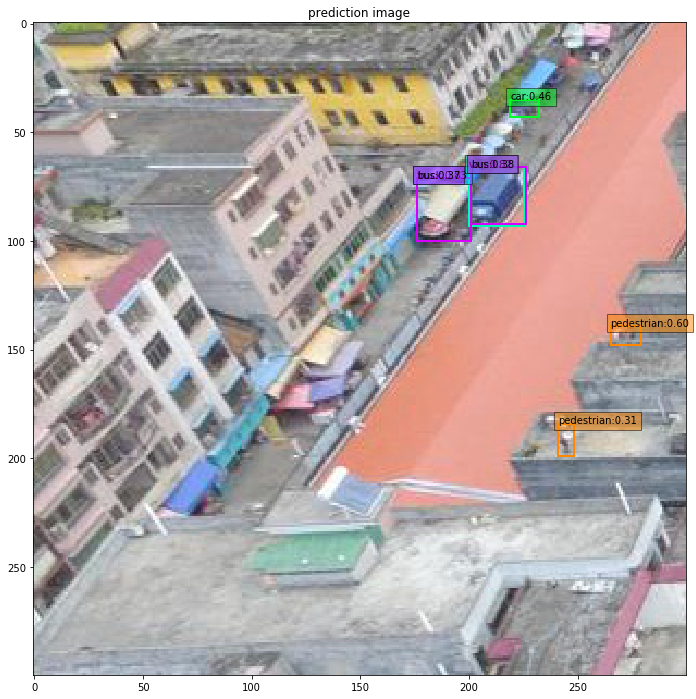

In [42]:
image = read_image_bgr('9999983_00000_d_0000014_004.jpg')


plt.figure(figsize=(12,12))
fig.add_subplot(1,2,2)
plt.title('prediction image')
plt.imshow(image)
# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
colors=plt.cm.hsv(np.linspace(0,1,len(labels_to_names))).tolist()
currentAxis=plt.gca()

for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.3:
        break
        
    b = box.astype(int)
    caption=labels_to_names[label]
    display_txt='%s:%.2f'%(caption,score)
    
    coords=((b[0],b[1]),b[2]-b[0],b[3]-b[1])
    color=colors[label]
    currentAxis.add_patch(plt.Rectangle(*coords,fill=False,edgecolor=color,linewidth=2))
    currentAxis.text(b[0],b[1],display_txt,bbox={'facecolor':color,'alpha':0.5})

#### 将大图切割为小图预测，再拼接起来

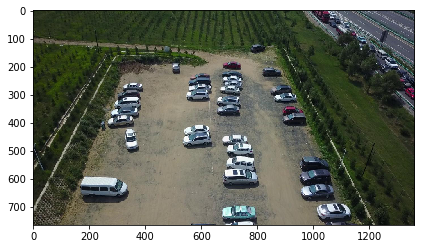

In [10]:
from skimage import io
import numpy as np

img_dir='imgs/0000000_03019_d_0000008.jpg'
# img_s_dir
large_img=io.imread(img_dir)
io.imshow(large_img)

In [11]:
def divide_for_train(img,img_name,target_size,stride):
    '''
    将大图切割为小图，将小图输入网络中做预测
    '''
    height,width,channels=img.shape
    sum_imgs=[]
    img_num=0
    for row in range(0,height,stride):
        for col in range(0,width,stride):
#             if row+target_size>height or col+target_size>width:
#                 row=height-stride
#                 col=
            if row+stride>=height:
                row=height-stride-1
            if col+stride>=width:
                col=width-stride-1
            #small_img表示一张比较小的图片,size为(target_size,target_size,3)
            small_img=img[row:row+target_size,col:col+target_size,:]
            sum_imgs.append(small_img)
            img_num+=1
    sum_imgs=np.array(sum_imgs)
    return sum_imgs

In [12]:
# sum_small_imgs=divide_for_train(large_img,'0000104_03451_d_0000068',300,300)

In [13]:
def produce_box(large_img,sum_small_imgs,stride=300):
    height,width,channels=large_img.shape
    index=0
    all_boxes={}
    all_boxes['bboxes']=[]
    all_boxes['score']=[]
    all_boxes['label']=[]
    for row in range(0,height,stride):
        for col in range(0,width,stride):
            if row+stride>=height:
                    row=height-stride-1
            if col+stride>=width:
                col=width-stride-1
    #         print(row,col)
            image=sum_small_imgs[index]
            index+=1
            #将图像从rgb转换为bgr
            image=image[:,:,::-1]
            image = preprocess_image(image)
            image, scale = resize_image(image)

            # process image
    #         start = time.time()
            boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    #         print("processing time: ", time.time() - start)

            # correct for image scale
            boxes /= scale
    #         print(boxes)

            for box, score, label in zip(boxes[0], scores[0], labels[0]):
                # scores are sorted so we can break
                if score < 0.5:
                    break
                b = box.astype(int)
                caption=labels_to_names[label]
                display_txt='%s:%.2f'%(caption,score)
                b_width=b[2]-b[0]
                b_height=b[3]-b[1]
                row_index=row/stride
                col_index=col/stride
                x0=b[0]+ col_index*stride
                y0=b[1]+row_index*stride
                tmp_box=[x0,y0,b_width,b_height]

                all_boxes['bboxes'].append(tmp_box)
                all_boxes['score'].append(score)
                all_boxes['label'].append(label)

    return all_boxes

In [14]:
sum_small_imgs=divide_for_train(large_img,'0000104_03451_d_0000068',300,300)
all_boxes=produce_box(large_img,sum_small_imgs,stride=300)

NameError: name 'preprocess_image' is not defined

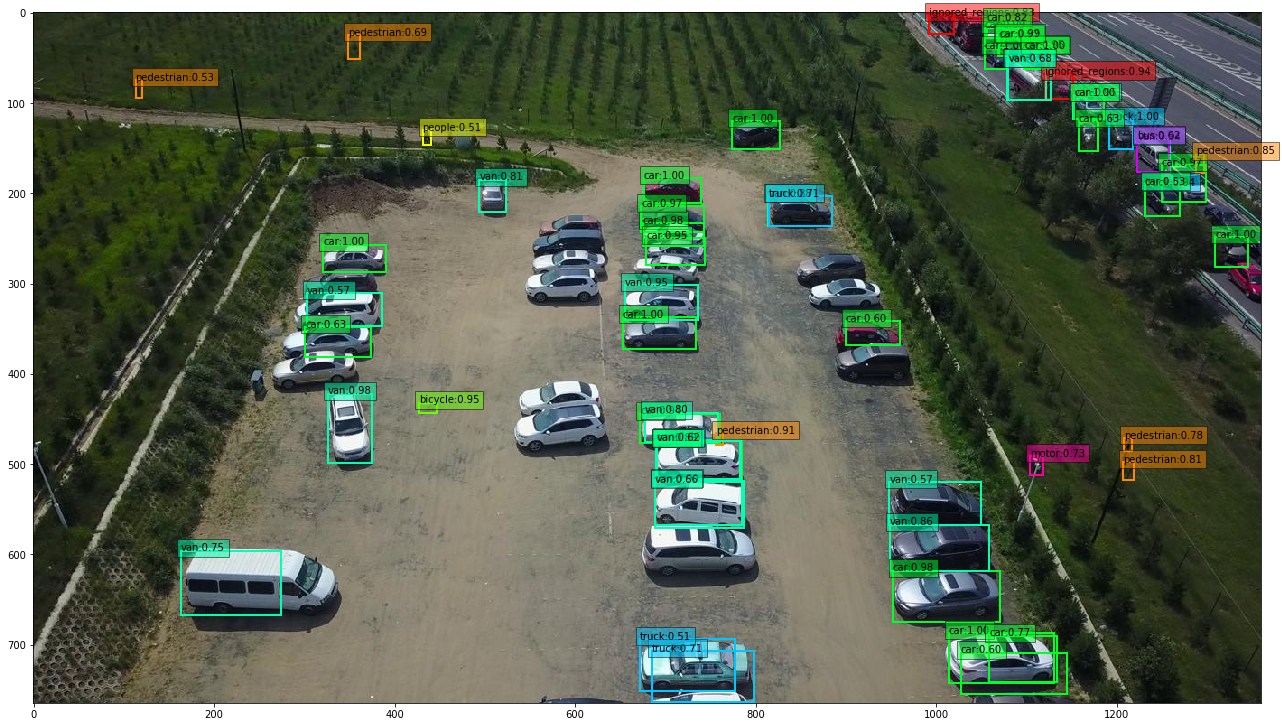

In [71]:

# all_boxes=produce_box(large_img,stride=300)

plt.figure(figsize=(22,22))
plt.imshow(large_img)

colors=plt.cm.hsv(np.linspace(0,1,len(labels_to_names))).tolist()
currentAxis=plt.gca()

for box,score,label in zip(all_boxes['bboxes'],all_boxes['score'],all_boxes['label']):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    b=np.array(box).astype(int)
    caption=labels_to_names[label]

    display_txt='%s:%.2f'%(caption,score)
    
    coords=((b[0],b[1]),b[2],b[3])
    color=colors[label]
    currentAxis.add_patch(plt.Rectangle(*coords,fill=False,edgecolor=color,linewidth=2))
    currentAxis.text(b[0],b[1],display_txt,bbox={'facecolor':color,'alpha':0.5})